In [22]:
#importing pandas module
#reading data file
import pandas as pd
df = pd.read_csv('apartments_offers.csv')

In [33]:
#preparing data, set 'district' input as label and transform 'furniture' into int
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['district_encoded'] = le.fit_transform(df['district'])

df['furniture'] = df['furniture'].astype(int)

In [24]:
#split data into train part and test part
from sklearn.model_selection import train_test_split

X = df[['district_encoded','numberOfRooms','meters','furniture']]
y = df['price']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)



In [25]:
#learning LinearRegression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)


In [26]:
#learning RandomForestRegressor model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)


In [28]:
#checking results, which model is more efficient
#rf is much better
from sklearn.metrics import mean_squared_error, r2_score


lr_test_mse  =mean_squared_error(y_test,y_pred_lr)
lr_test_r2 = r2_score(y_test,y_pred_lr)

rf_test_mse = mean_squared_error(y_test,y_pred_rf)
rf_test_r2 = r2_score(y_test,y_pred_rf)

table = pd.DataFrame({"MSE":[lr_test_mse,rf_test_mse],"R2":[lr_test_r2,rf_test_r2]}, index=["Linear Regression","RandomForest Regressor"])

table


,MSE,R2
Linear Regression,7.360486e+10,0.646598
RandomForest Regressor,5.857355e+10,0.718768


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

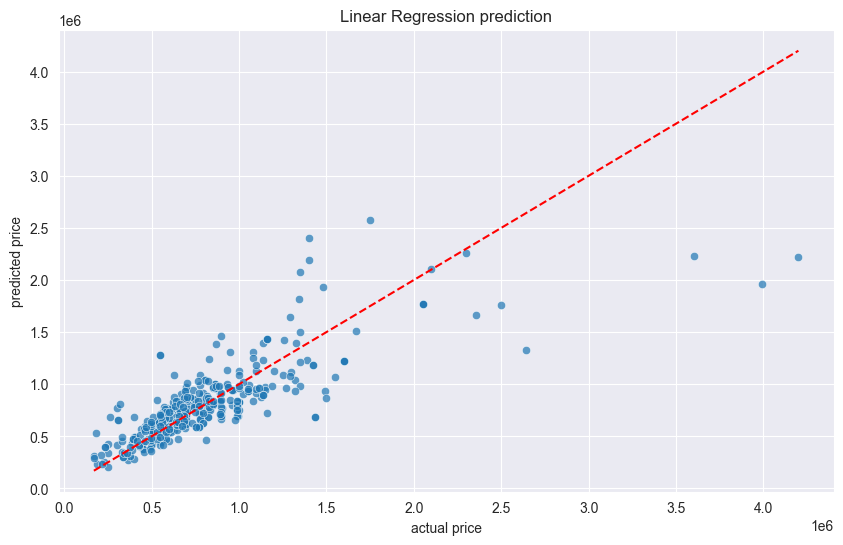

In [30]:
#graphic view on model results
#Linear

plt.figure(figsize=(10,6))

sns.scatterplot(x=y_test,y=y_pred_lr,alpha=0.7)

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',linestyle='--')

plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Linear Regression prediction")

plt.grid(True)
plt.show()


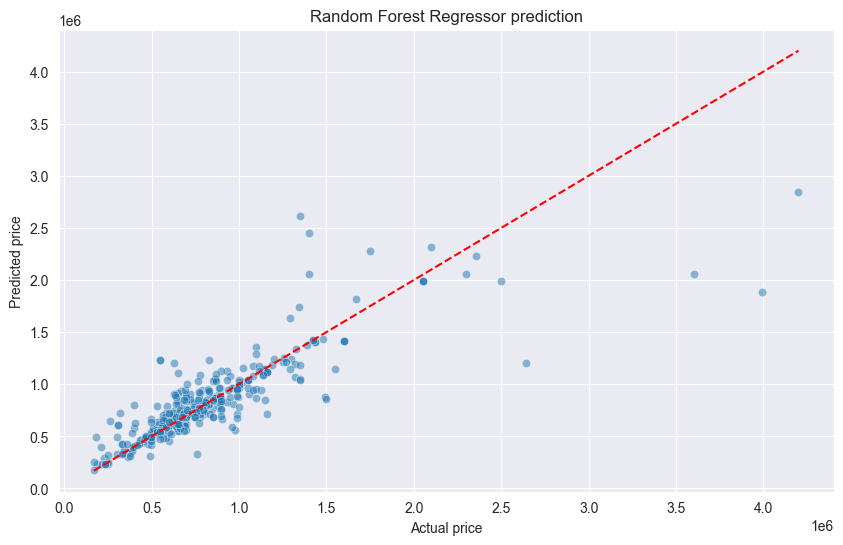

In [31]:
#graphic view on model results
#RF

plt.figure(figsize=(10,6))

sns.scatterplot(x=y_test,y=y_pred_rf,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',linestyle='--')

plt.xlabel("Actual price")
plt.ylabel("Predicted price")

plt.title('Random Forest Regressor prediction')

plt.grid(True)
plt.show()


In [11]:
#exporting model into .pkl file

import joblib

joblib.dump(lr,'lr_model.pkl')
joblib.dump(rf,'rf_model.pkl')



['rf_model.pkl']